# Impacts of School and Attitude Characteristics on Students' Sense of Belonging to School and Out-of-School Study Time
## by Ying Zhu

## Investigation Overview

In this investigation, I wanted to figure out what factors have strong influence on students' sense of belonging to school and their out-of-school study time. The main focus is on students' attitude towards school learning, teacher-student relations and whether the residing country belongs to OECD (short for The Organisation for Economic Co-operation and Development).

## Dataset Overview

There are 485490 students records in the dataset Pisa with 15 features (column names has been explained below), extracted from PISA 2012 assessment of reading, math and science representing about 28 million 15-year-olds globally. The attributes I will explain in detail in this report include: students' sense of belonging to school ("ANCBELONG"), out-of-school study time per week ("OUTHOURS"), whether an OECD country ("OECD"), attitude towards school learning ("ANCATSCHL") and teacher-student relations ("ANCSTUDREL").

Half of the total data points were removed from the analysis due to missing key information. Another 5000 data points are also filtered because of outliers and polarized information in sense of belonging to school ("ANCBELONG") and out-of-school study time per week ("OUTHOURS"). Therefore, I will mainly work on the Pisa_mainstream dataset with 136784 records and 5 colunms.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
Pisa=pd.read_csv('Pisa_result.csv')
Pisa.head()

,NC,OECD,ST04Q01,GRADE,ESCS,MMINS,OUTHOURS,ANCINTMAT,ANCMATWKETH,ANCCOGACT,ANCSTUDREL,ANCMTSUP,ANCATSCHL,ANCATTLNACT,ANCBELONG
0,Albania,Non-OECD,Female,0.0,NaN,NaN,NaN,0.0486,-0.2199,-0.0219,-0.5901,-0.5983,-1.8636,-0.6779,-0.7351
1,Albania,Non-OECD,Female,0.0,NaN,270.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Non-OECD,Female,-1.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Non-OECD,Female,-1.0,NaN,135.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Non-OECD,Female,-1.0,NaN,NaN,NaN,0.0486,0.9341,0.4940,0.2492,0.4052,0.6517,0.4908,0.8675


In [4]:
Pisa.shape

(485490, 15)

In [5]:
#store all the column explanations into a dictionary for easier reference in the future

Col_explanation=pd.read_csv("pisadict2012.csv",encoding = "ISO-8859-1")
Ab_dict=dict()
for i in Col_explanation.index:
    key=Col_explanation["Ab"][i]
    Ab_dict[key]=Col_explanation.Feature[i]

In [6]:
for i in Pisa.columns:
    print(i, "          "+Ab_dict[i])

NC           National Centre 6-digit Code
OECD           OECD country
ST04Q01           Gender
GRADE           Grade compared to modal grade in country
ESCS           Index of economic, social and cultural status
MMINS           Learning time (minutes per week)- <Mathematics>
OUTHOURS           Out-of-School Study Time
ANCINTMAT           Mathematics Interest (Anchored)
ANCMATWKETH           Mathematics Work Ethic (Anchored)
ANCCOGACT           Cognitive Activation in Mathematics Lessons (Anchored)
ANCSTUDREL           Teacher Student Relations (Anchored)
ANCMTSUP           Mathematics Teacher's Support (Anchored)
ANCATSCHL           Attitude towards School: Learning Outcomes (Anchored)
ANCATTLNACT           Attitude towards School: Learning Activities (Anchored)
ANCBELONG           Sense of Belonging to School (Anchored)


In [7]:
sum(Pisa["ANCBELONG"].isnull())

177850

In [8]:
Pisa_flag=(Pisa["ANCBELONG"] >=-2) & (Pisa["ANCBELONG"]<=2)
Pisa_mainstream=Pisa.loc[Pisa_flag,:]

In [9]:
high_outliers = (Pisa_mainstream["OUTHOURS"] > 60)
Pisa_mainstream=Pisa_mainstream.loc[-high_outliers,:]
Pisa_mainstream.shape

(287391, 15)

In [10]:
Pisa_mainstream=Pisa_mainstream[["OECD","ANCBELONG","OUTHOURS","ANCATSCHL","ANCSTUDREL"]]
Pisa_mainstream.head()

,OECD,ANCBELONG,OUTHOURS,ANCATSCHL,ANCSTUDREL
0,Non-OECD,-0.7351,NaN,-1.8636,-0.5901
4,Non-OECD,0.8675,NaN,0.6517,0.2492
6,Non-OECD,0.0064,10.0,-0.1954,0.3536
8,Non-OECD,0.9963,NaN,3.0423,0.7959
9,Non-OECD,-0.4549,23.0,-0.3395,-0.3870


In [11]:
Pisa_mainstream.dropna(axis=0,inplace=True)
Pisa_mainstream.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136784 entries, 6 to 485488
Data columns (total 5 columns):
OECD          136784 non-null object
ANCBELONG     136784 non-null float64
OUTHOURS      136784 non-null float64
ANCATSCHL     136784 non-null float64
ANCSTUDREL    136784 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.3+ MB


## Distribution of Students' Sense of Belonging to School

Students' sense of belonging to school is the chosen key variable, which is a discrete numerical feature. The distribution looks like an unimodal centered around 0.2, with more data points falling into the range of -1 to 1.

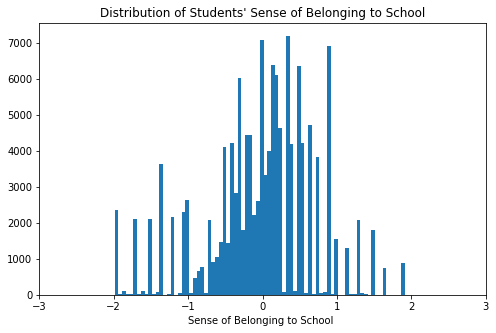

In [12]:
fig = plt.figure(figsize=[8,5])

plt.hist(data=Pisa_mainstream,x="ANCBELONG",bins=np.arange(min(Pisa_mainstream["ANCBELONG"]), max(Pisa_mainstream["ANCBELONG"])+0.05, 0.05))
plt.xlim([-3,3])
plt.xlabel('{}'.format(Ab_dict["ANCBELONG"].split("(")[0]))
plt.title("Distribution of Students' Sense of Belonging to School");

## Distribution of Students' Out of School Study Time

Students' out-of-school study time per week is also a discrete numerical variable ranging from 0 hour to 60 hours. The distribution is right skewed unimodal, indicating a small portion of students are studying substantial longer time after school per week, compared to the majority of students in this dataset.

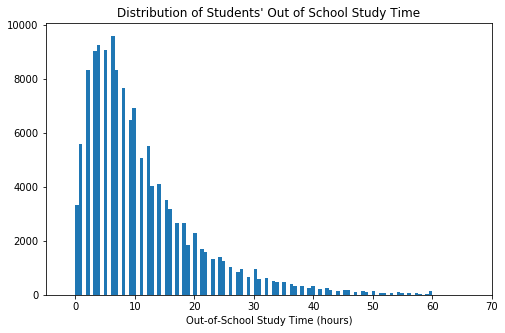

In [13]:
fig = plt.figure(figsize=[8,5])

plt.hist(data=Pisa_mainstream,x="OUTHOURS",bins=100)
plt.xlim([-5,70])
plt.xlabel('{} (hours)'.format(Ab_dict["OUTHOURS"].split("(")[0]))
plt.title("Distribution of Students' Out of School Study Time");

## Distribution of Country Category

In this dataset, there are more students residing in counties from OECD than others from Non-OECD countries.

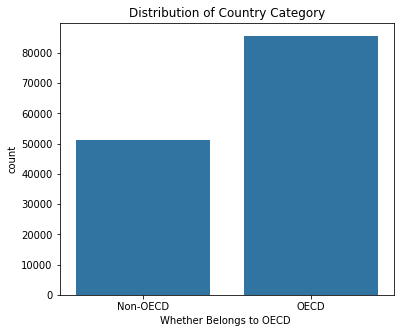

In [14]:
plt.figure(figsize=[6,5])

sb.countplot(data = Pisa_mainstream, x = 'OECD', color =sb.color_palette()[0])
plt.xlabel('{} '.format("Whether Belongs to OECD"))
plt.title("Distribution of Country Category");

## Distribution of Students' Attitude towards School Learning

Students' attitude towards school learning is also discrete numerical variable ranging from -3 to slightly larger than 3. The distribution looks quite like an unimodal centered around 0.1.

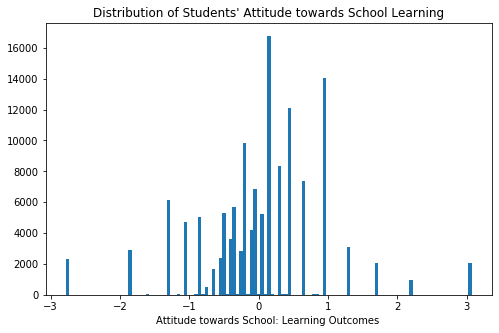

In [15]:
fig = plt.figure(figsize=[8,5])

plt.hist(data=Pisa_mainstream,x="ANCATSCHL",bins=np.arange(min(Pisa_mainstream["ANCATSCHL"]), max(Pisa_mainstream["ANCATSCHL"])+0.05, 0.05))

plt.xlabel('{}'.format(Ab_dict["ANCATSCHL"].split("(")[0]))
plt.title("Distribution of Students' Attitude towards School Learning");

## Distribution of Teacher-Student Relations

Teacher-student relations is again discrete numerical variable ranging from -3 to 3. The distribution resembles above "attitude towards school learning" pattern a lot, indicating a stong correlation between these two factors. Looks quite like an unimodal centered around 0.2.

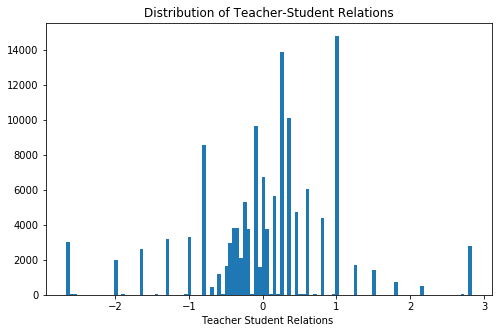

In [16]:
fig = plt.figure(figsize=[8,5])

plt.hist(data=Pisa_mainstream,x="ANCSTUDREL",bins=np.arange(min(Pisa_mainstream["ANCSTUDREL"]), max(Pisa_mainstream["ANCSTUDREL"])+0.05, 0.05))

plt.xlabel('{}'.format(Ab_dict["ANCSTUDREL"].split("(")[0]))
plt.title("Distribution of Teacher-Student Relations");

## Sense of Belonging to School vs. Attitude towards School Learning

Plotting students' sense of belong to school and attitude towards school learning together produces a rough linear relationship, which means students'attitude towards school learning has a strong positive correlation on their sense of belonging to school.

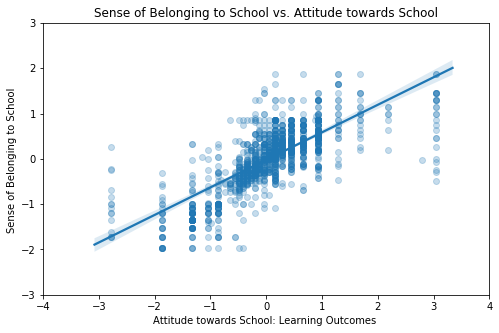

In [17]:
##Sample 5000 pisa data so that plot is clearer and renders faster

fig = plt.figure(figsize=[8,5])
samples = np.random.choice(Pisa_mainstream.shape[0], 5000, replace = False)
Pisa_mainstream_sam = Pisa_mainstream.loc[samples,:]
base_color = sb.color_palette()[0]

sb.regplot(data = Pisa_mainstream_sam, x = "ANCATSCHL", y = "ANCBELONG",scatter_kws = {'alpha' : 1/4},color=base_color)
plt.xlim([-4,4])
plt.ylim([-3,3])

plt.xlabel('{}'.format(Ab_dict["ANCATSCHL"].split("(")[0]))
plt.ylabel('{}'.format(Ab_dict["ANCBELONG"].split("(")[0]))
plt.title("Sense of Belonging to School vs. Attitude towards School");

## Sense of Belonging to School vs. Teacher-Student Relations

Plotting students' sense of belong to school and teacher-student relations together also produces a rough linear relationship, which means teacher-student relations has a strong positive correlation on students' sense of belonging to school.

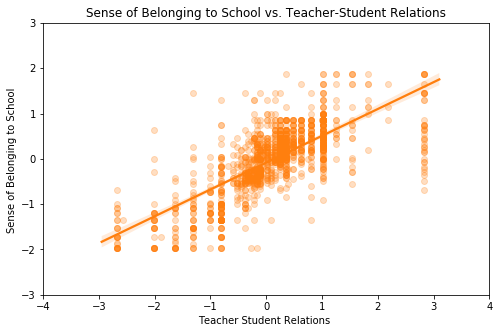

In [18]:
##Sample 5000 pisa data so that plot is clearer and renders faster

fig = plt.figure(figsize=[8,5])
samples = np.random.choice(Pisa_mainstream.shape[0], 5000, replace = False)
Pisa_mainstream_sam = Pisa_mainstream.loc[samples,:]
base_color = sb.color_palette()[1]

sb.regplot(data = Pisa_mainstream_sam, x = "ANCSTUDREL", y = "ANCBELONG",scatter_kws = {'alpha' : 1/4},color=base_color);
plt.xlim([-4,4])
plt.ylim([-3,3])

plt.xlabel('{}'.format(Ab_dict["ANCSTUDREL"].split("(")[0]))
plt.ylabel('{}'.format(Ab_dict["ANCBELONG"].split("(")[0]))
plt.title("Sense of Belonging to School vs. Teacher-Student Relations");

## Multivariate Relationship

It's quite clear from the following plotting that as students' attitude towards school learning increases, sense of belonging to school also increases, do does teacher-student relations. Therefore, these three variables are highly correlated with each other.

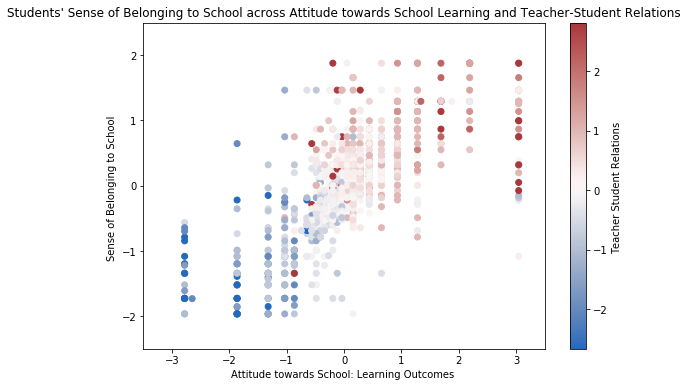

In [19]:
##Sample 5000 pisa data so that plot is clearer and renders faster

samples = np.random.choice(Pisa_mainstream.shape[0], 5000, replace = False)
Pisa_mainstream_sam = Pisa_mainstream.loc[samples,:]

plt.figure(figsize=[9,6])
plt.scatter(data = Pisa_mainstream_sam, c = 'ANCSTUDREL', y = 'ANCBELONG', x = 'ANCATSCHL',cmap = 'vlag')
plt.xlim([-3.5,3.5])
plt.ylim([-2.5,2.5])
plt.xlabel('{}'.format(Ab_dict["ANCATSCHL"].split("(")[0]))
plt.ylabel('{}'.format(Ab_dict["ANCBELONG"].split("(")[0]))
cb=plt.colorbar()
cb.set_label('{}'.format(Ab_dict["ANCSTUDREL"].split("(")[0]))
plt.title("Students' Sense of Belonging to School across Attitude towards School Learning and Teacher-Student Relations");

## Sense of Belonging to School and Out of School Study Time by Country Category

One last thing I found interesting about this dataset: Students from OECD countries generally report higher sense of belonging to school, but meanwhile shorter out-of-school study time, compared to their peers from Non-OECD countries.

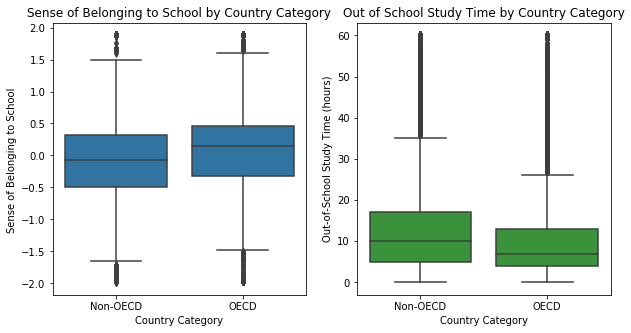

In [20]:
plt.figure(figsize=[10,5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
ax1=sb.boxplot(data = Pisa_mainstream, x = 'OECD', y = 'ANCBELONG', color = sb.color_palette()[0]);
ax1.set_ylabel('{}'.format(Ab_dict["ANCBELONG"].split("(")[0]))
ax1.set_xlabel("Country Category")
ax1.set_title("Sense of Belonging to School by Country Category");

plt.subplot(1, 2, 2)
ax2=sb.boxplot(data = Pisa_mainstream, x = 'OECD', y = 'OUTHOURS', color = sb.color_palette()[2])
ax2.set_ylabel('{} (hours)'.format(Ab_dict["OUTHOURS"].split("(")[0]))
ax2.set_xlabel("Country Category")
ax2.set_title("Out of School Study Time by Country Category");

In [ ]:
!jupyter nbconvert PISA_Presentation.ipynb --to slides --post serve --template output_toggle